# **Exploratory Data Analysis**

Data loading and Identify the dataframe structure

In [2]:
#import neccessary libraries
import pandas as pd
import numpy as np

In [3]:
#Load the dataset
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Check no.of rows and colunms
df.shape

(21613, 21)

In [5]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Check the data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]
0    7129300520
1    6414100192
2    5631500400
3    2487200875
4    1954400510
Name: id, dtype: category
Categories (21436, int64): [1000102, 1200019, 1200021, 2800031, ..., 9842300485, 9842300540, 9895000040, 9900000190]


Handling missing values, duplicates and datatypes


In [13]:
# Check for missing values
print(df.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [21]:
#Check duplicated rows
df.duplicated().sum()

0

In [ ]:
#Change date into datetiem formate
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#Change zipcode and id to categorical
df['zipcode'] = df['zipcode'].astype('category')
df['id'] = df['id'].astype('category')  

In [23]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])  

# Convert waterfront to categorical
df['waterfront'] = df['waterfront'].astype('category')  

In [35]:
# Manually define categorical features since ID, Zipcode should be categorical
categorical_features = ["id", "zipcode"]  
numerical_features = []  

# Identify feature data types
for column in df.columns:
    if column not in categorical_features:  
        if df[column].dtype in ('int64', 'float64'):
            numerical_features.append(column)
        else:
            categorical_features.append(column)

# Identify Binary and Ordinal Features
binary_features = []
ordinal_features = []

for column in numerical_features + categorical_features:
    unique_values = df[column].nunique()
    
    # Identify Binary Features
    if unique_values == 2:
        binary_features.append(column)

    # Identify Ordinal Features (Threshold can be adjusted)
    elif unique_values < 10:
        ordinal_features.append(column)


# Convert date column
df['date'] = pd.to_datetime(df['date'])  

print("\n✅ Numerical Features:", numerical_features)
print("\n✅ Categorical Features:", categorical_features)
print("\n✅ Binary Features:", binary_features)
print("\n✅ Ordinal Features:", ordinal_features)



✅ Numerical Features: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

✅ Categorical Features: ['id', 'zipcode', 'date', 'waterfront']

✅ Binary Features: ['waterfront']

✅ Ordinal Features: ['floors', 'view', 'condition']


Descriptive statistics and visualization

In [38]:
#Get Summary statistics of dataset
print(df.describe())

                                date         price      bedrooms  \
count                          21613  2.161300e+04  21613.000000   
mean   2014-10-29 04:38:01.959931648  5.400881e+05      3.370842   
min              2014-05-02 00:00:00  7.500000e+04      0.000000   
25%              2014-07-22 00:00:00  3.219500e+05      3.000000   
50%              2014-10-16 00:00:00  4.500000e+05      3.000000   
75%              2015-02-17 00:00:00  6.450000e+05      4.000000   
max              2015-05-27 00:00:00  7.700000e+06     33.000000   
std                              NaN  3.671272e+05      0.930062   

          bathrooms   sqft_living      sqft_lot        floors          view  \
count  21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
mean       2.114757   2079.899736  1.510697e+04      1.494309      0.234303   
min        0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%        1.750000   1427.000000  5.040000e+03      1.000000      0.00

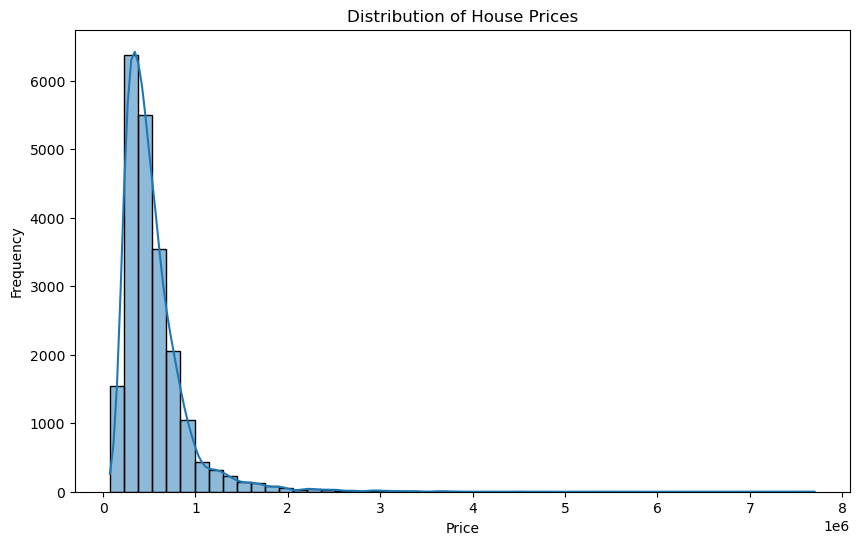

In [41]:
# Distribution of target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

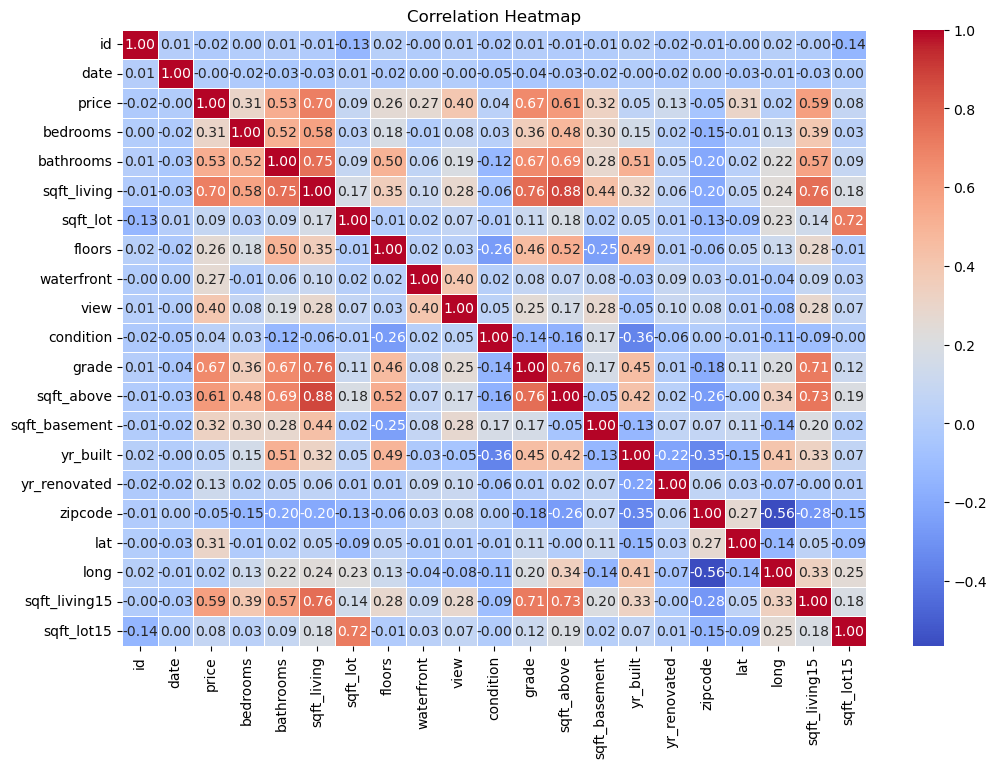

In [43]:
#Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


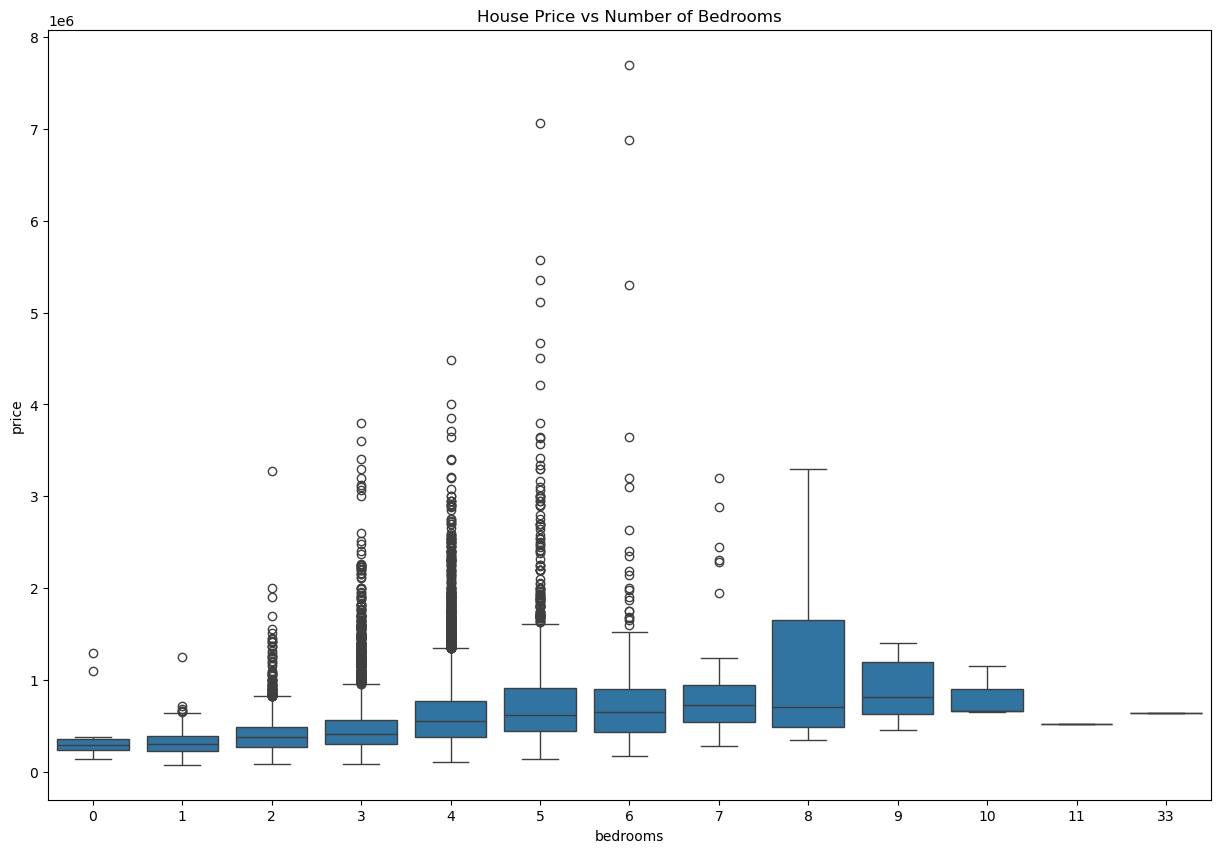

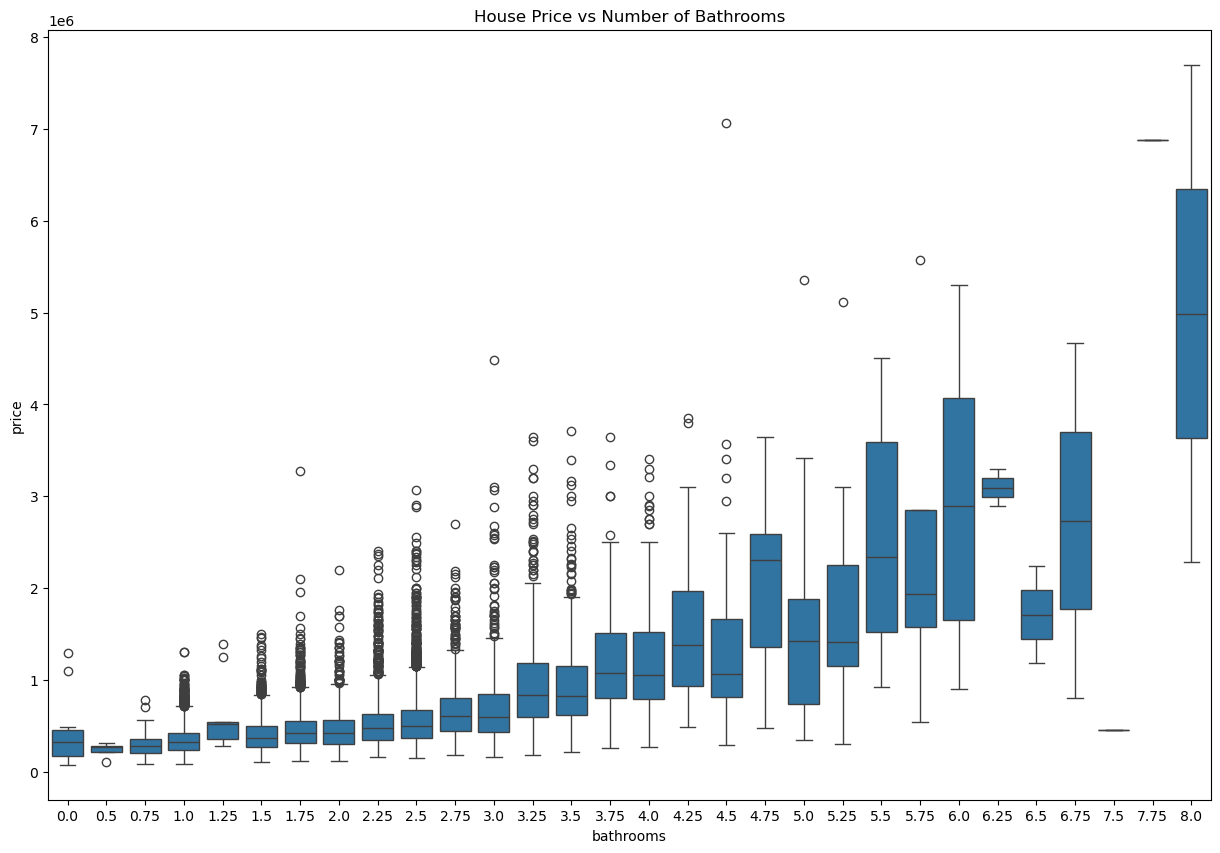

In [46]:
#identify relationship between price and no.of. bedrooms and bathrooms
plt.figure(figsize=(15,10))
sns.boxplot(x=df["bedrooms"], y=df["price"])
plt.title("House Price vs Number of Bedrooms")
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(x=df["bathrooms"], y=df["price"])
plt.title("House Price vs Number of Bathrooms")
plt.show()


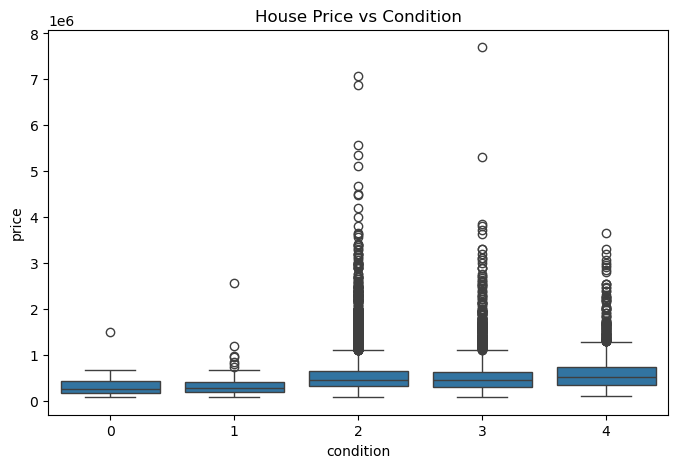

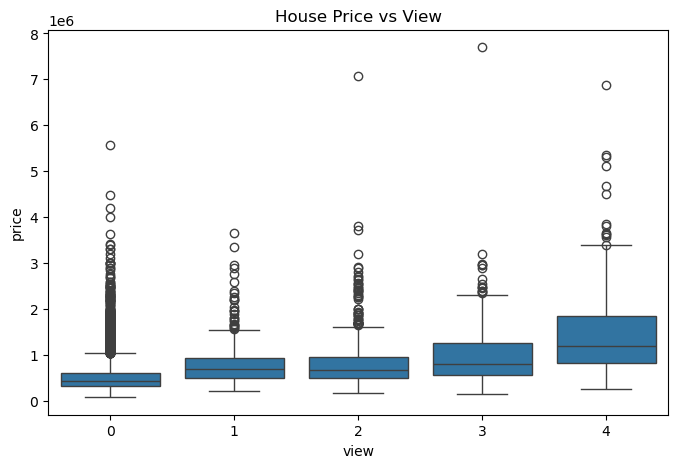

In [47]:

#Price distribution by house condition and view
plt.figure(figsize=(8,5))
sns.boxplot(x=df["condition"], y=df["price"])
plt.title("House Price vs Condition")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df["view"], y=df["price"])
plt.title("House Price vs View")
plt.show()


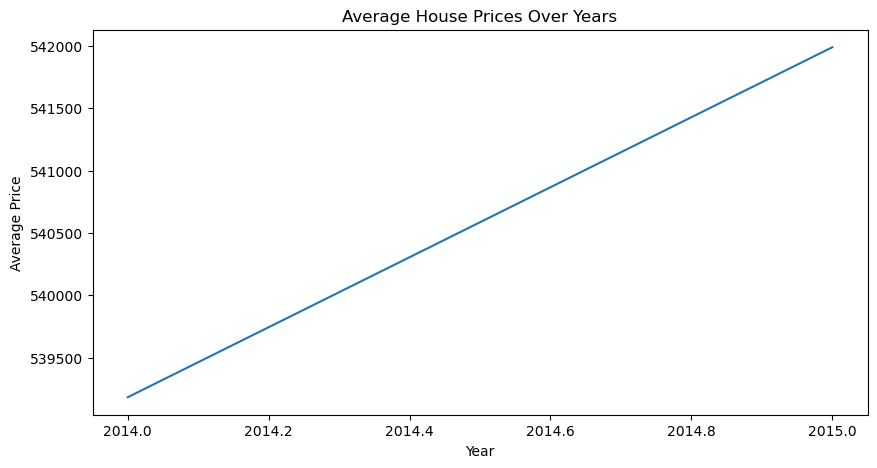

In [48]:
#Get price trend over the time
df['year_sold'] = df['date'].dt.year
avg_price_per_year = df.groupby("year_sold")["price"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values)
plt.title("Average House Prices Over Years")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()


In [49]:
#grouping house prices
# Define price quantiles
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Check distribution
df['price_category'].value_counts()


price_category
Low       7226
Medium    7223
High      7164
Name: count, dtype: int64

price_category
Low       7226
Medium    7223
High      7164
Name: count, dtype: int64


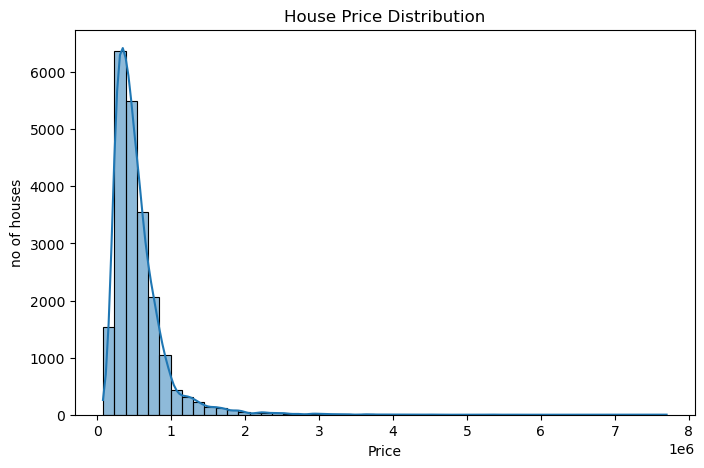

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define price categories using quantiles
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Check distribution of categories
print(df['price_category'].value_counts())

# Visualize price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("no of houses")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22616\2469741177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['price_category'], y=df['price'], palette='coolwarm')


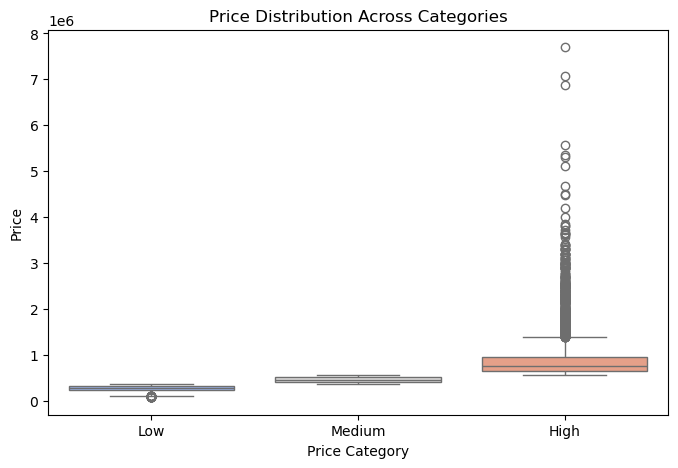

In [ ]:
#Boxplot of each price range
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price_category'], y=df['price'], palette='coolwarm')
plt.title("Price Distribution Across Categories")
plt.xlabel("Price Category")
plt.ylabel("Price")
plt.show()
